In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'product_sales.csv'  
df = pd.read_csv(file_path)

In [2]:
summary_statistics = df.describe(include='all')
summary_statistics

,Product_ID,Product_Category,Retail_Price,Seasonal,Material,Color,Units_Sold
count,100000.000000,100000,100000.000000,100000,100000,100000,100000.000000
unique,NaN,5,NaN,2,5,6,NaN
top,NaN,Health,NaN,Yes,Metal,Blue,NaN
freq,NaN,20187,NaN,50113,20232,16814,NaN
mean,50000.500000,NaN,255.357113,NaN,NaN,NaN,49.917930
std,28867.657797,NaN,141.318357,NaN,NaN,NaN,28.538768
min,1.000000,NaN,10.000000,NaN,NaN,NaN,1.000000
25%,25000.750000,NaN,132.790000,NaN,NaN,NaN,25.000000
50%,50000.500000,NaN,255.550000,NaN,NaN,NaN,50.000000
75%,75000.250000,NaN,377.315000,NaN,NaN,NaN,75.000000


In [3]:
missing_values = df.isnull().sum()
missing_values

Product_ID          0
Product_Category    0
Retail_Price        0
Seasonal            0
Material            0
Color               0
Units_Sold          0
dtype: int64

<b>Outlier Detection</b>

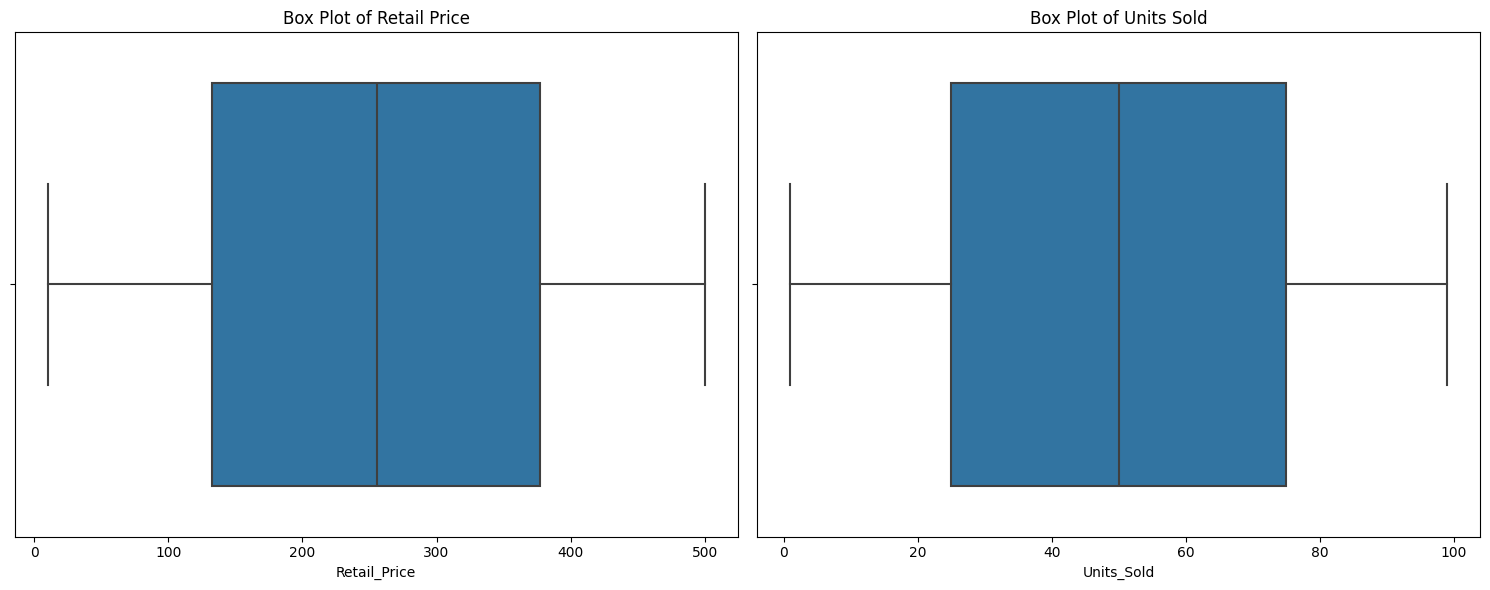

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x=df['Retail_Price'], ax=axes[0])
axes[0].set_title('Box Plot of Retail Price')

sns.boxplot(x=df['Units_Sold'], ax=axes[1])
axes[1].set_title('Box Plot of Units Sold')

plt.tight_layout()
plt.show()

<b>Correlation Analysis</b>

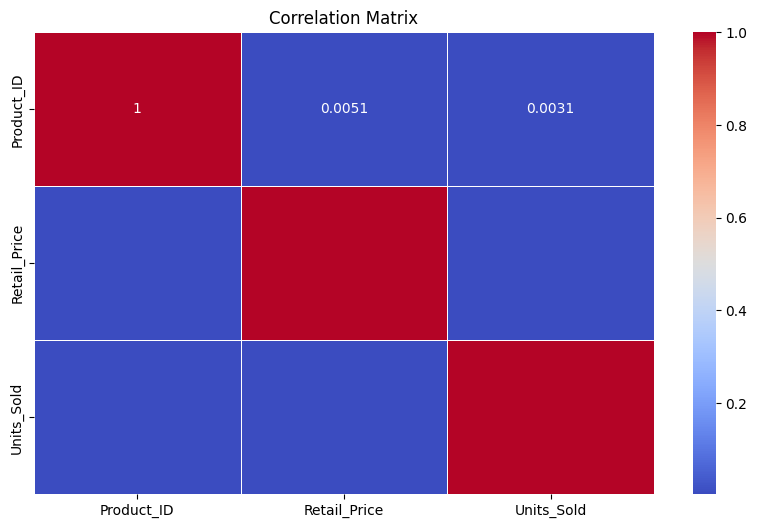

In [5]:
numerical_cols = df.select_dtypes(include=[np.number])

# Correlation Analysis
correlation_matrix = numerical_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<b>Check if 'Product_Category' Imbalanced</b>

In [6]:
category_counts = df['Product_Category'].value_counts()
print("Product Category Counts:\n", category_counts)

Product Category Counts:
 Product_Category
Health           20187
Clothing         20082
Electronics      20018
Sports           19981
Home & Garden    19732
Name: count, dtype: int64


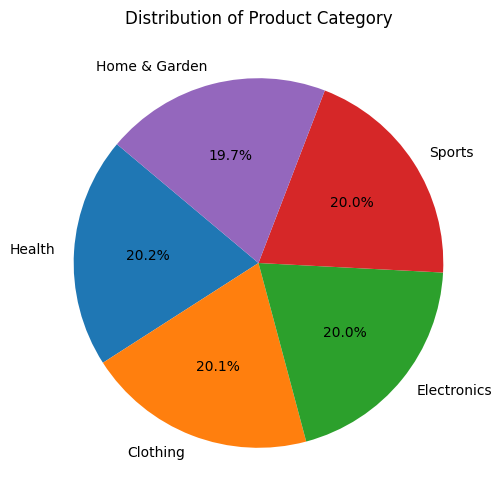

In [7]:
plt.figure(figsize=(10, 6))
df['Product_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Category')
plt.ylabel('')
plt.show()

<b>Segment Analysis</b>

In [8]:
sales_by_category = df.groupby('Product_Category')['Units_Sold'].sum().reset_index()
sales_by_seasonal = df.groupby('Seasonal')['Units_Sold'].sum().reset_index()
sales_by_material = df.groupby('Material')['Units_Sold'].sum().reset_index()
sales_by_color = df.groupby('Color')['Units_Sold'].sum().reset_index()

In [9]:
sales_by_category

,Product_Category,Units_Sold
0,Clothing,1006053
1,Electronics,993396
2,Health,1010014
3,Home & Garden,978804
4,Sports,1003526


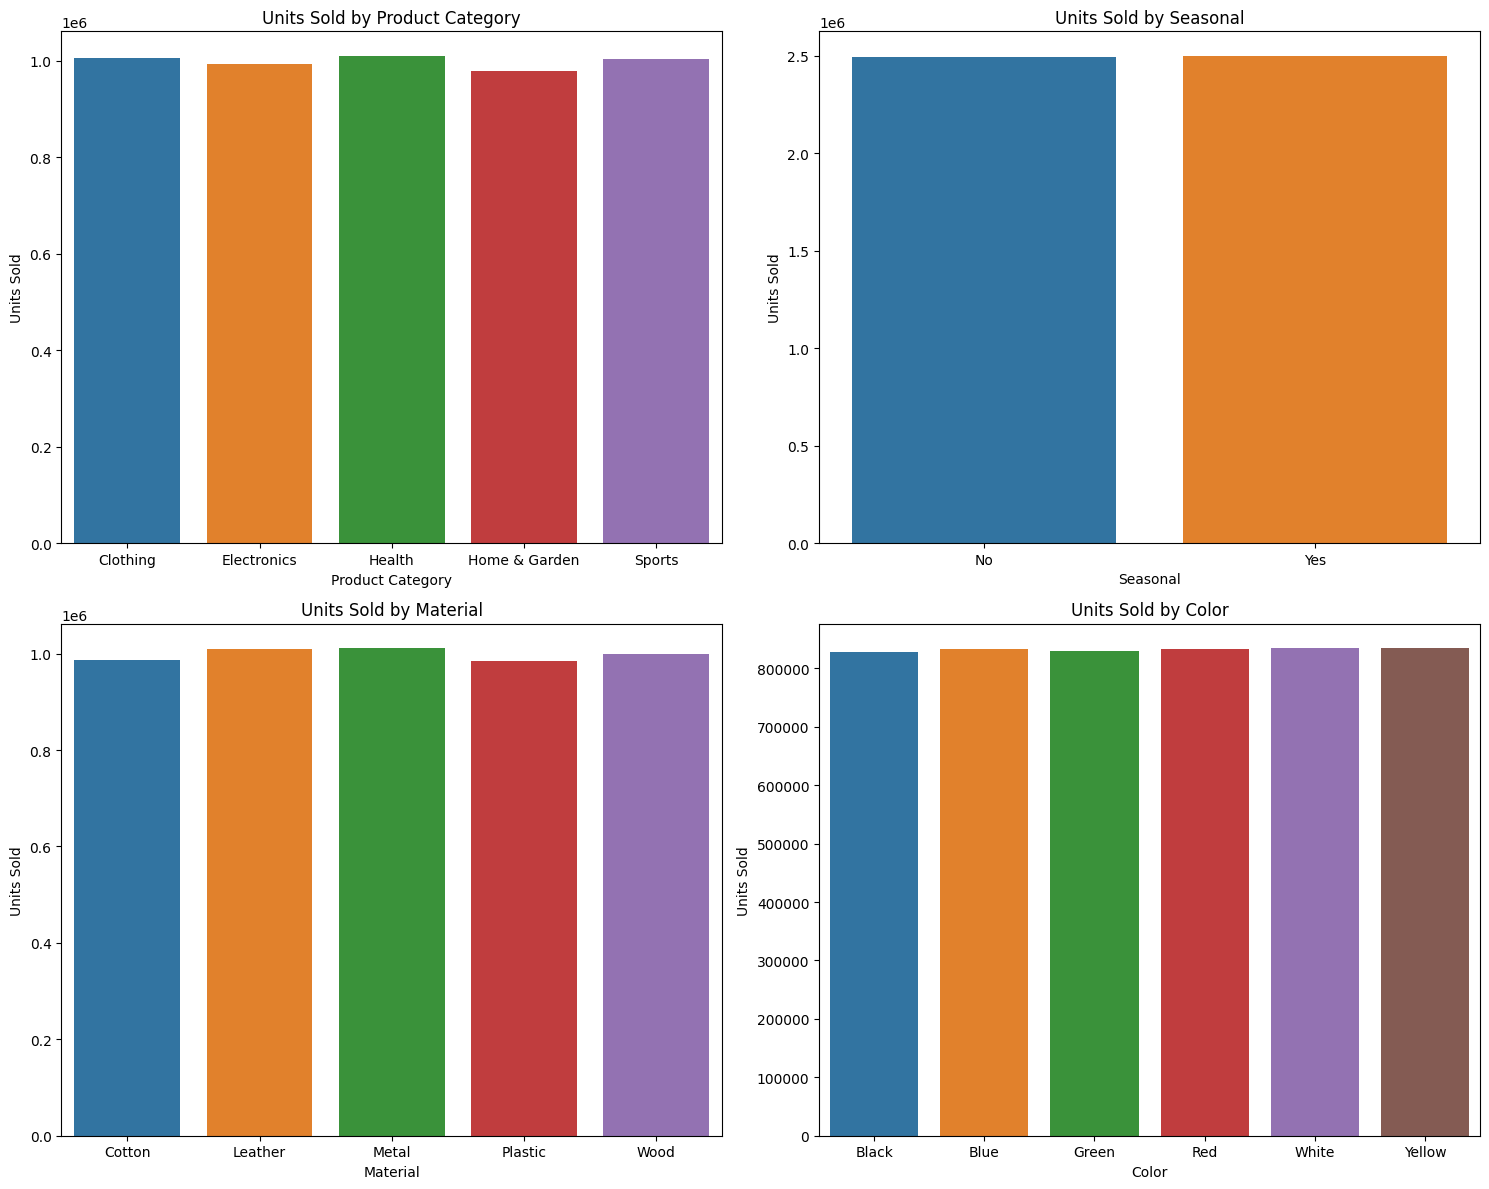

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='Product_Category', y='Units_Sold', data=sales_by_category, ax=axes[0, 0])
axes[0, 0].set_title('Units Sold by Product Category')
axes[0, 0].set_xlabel('Product Category')
axes[0, 0].set_ylabel('Units Sold')

sns.barplot(x='Seasonal', y='Units_Sold', data=sales_by_seasonal, ax=axes[0, 1])
axes[0, 1].set_title('Units Sold by Seasonal')
axes[0, 1].set_xlabel('Seasonal')
axes[0, 1].set_ylabel('Units Sold')

sns.barplot(x='Material', y='Units_Sold', data=sales_by_material, ax=axes[1, 0])
axes[1, 0].set_title('Units Sold by Material')
axes[1, 0].set_xlabel('Material')
axes[1, 0].set_ylabel('Units Sold')

sns.barplot(x='Color', y='Units_Sold', data=sales_by_color, ax=axes[1, 1])
axes[1, 1].set_title('Units Sold by Color')
axes[1, 1].set_xlabel('Color')
axes[1, 1].set_ylabel('Units Sold')

plt.tight_layout()
plt.show()